### El número de personas que debieron ser encuestadas para detectar la pequeña diferencia en el resultado electoral entre López y Galán

Código original de Nelson Amaya Durán
```
library(pwr)
p <- pwr.2p.test(h=ES.h(0.3521,0.3248),power=0.8,sig.level = 0.05,alternative="two.sided")
plot(p)
```

In [1]:
from statsmodels.stats.power import tt_ind_solve_power # equivalente a 2p.test de la libreria pwr (R)
from statsmodels.stats.proportion import proportion_effectsize # equivalente a ES.h de la libreria pwr (R)
import matplotlib.pyplot as plt
import seaborn as sns # para que se vea bonito
from matplotlib.ticker import PercentFormatter 
import numpy as np
%matplotlib inline

In [2]:
p1=0.3521 # Lopez
p2=0.3248 # Galan
power=np.linspace(0.1,0.9,20)
tails='two-sided'
alpha=0.05
es=proportion_effectsize(p1, p2, method='normal') 
n=[tt_ind_solve_power(effect_size=es,alpha=alpha,power=pw, ratio=1.0, alternative=tails) for pw in power]

Text(0,0.5,'Test power')

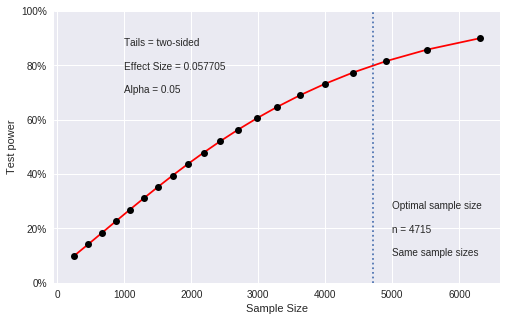

In [3]:
optss=tt_ind_solve_power(effect_size=es,alpha=0.05,power=0.8, ratio=1.0, alternative='two-sided')
plt.figure(figsize=(8,5))
plt.plot(n,power,c='r',marker='o',markerfacecolor='k')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.axvline(optss,ls=':')
plt.ylim(0,1)
plt.text(5000,0.1,s='Optimal sample size\n\nn = %i\n\nSame sample sizes'%optss)
plt.text(1000,0.7,s='Tails = %s\n\nEffect Size = %f\n\nAlpha = %s'%(tails,es,alpha))
plt.xlabel('Sample Size')
plt.ylabel('Test power')